In [1]:
import pandas as pd
from matplotlib import pyplot as plt

df =pd.read_csv("nasdaq100.csv",sep=";")

df.head()

,Date,Starting (USD),Ending (USD)
0,01.01.24,16800,16500
1,01.12.23,15900,16100
2,01.11.23,15800,15300
3,01.10.23,16100,16200
4,01.09.23,16300,15700


In [2]:
df.isnull().sum()

Date              0
Starting (USD)    0
Ending (USD)      0
dtype: int64

In [3]:
df=df.drop(columns=["Date"])
df.head()

,Starting (USD),Ending (USD)
0,16800,16500
1,15900,16100
2,15800,15300
3,16100,16200
4,16300,15700


Text(0, 0.5, 'Ending USD')

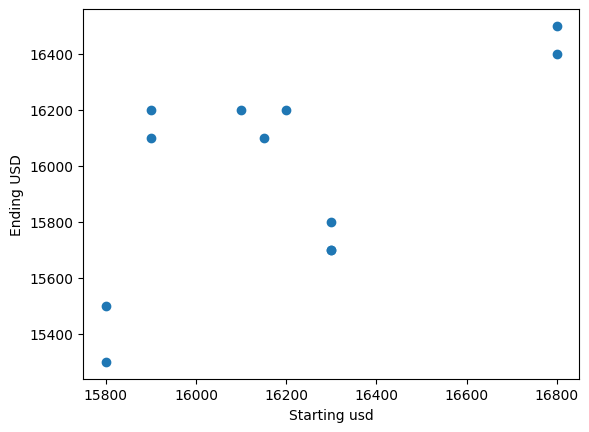

In [4]:
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])
plt.xlabel('Starting usd')
plt.ylabel('Ending USD')

In [5]:
x=df.drop('Ending (USD)',axis=1)
x.head()

,Starting (USD)
0,16800
1,15900
2,15800
3,16100
4,16300


In [6]:
y=df['Ending (USD)']
y

0     16500
1     16100
2     15300
3     16200
4     15700
5     16400
6     16200
7     15500
8     16100
9     15800
10    16200
11    15700
Name: Ending (USD), dtype: int64

In [7]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x,y)
df['predicted_y']=reg.predict(x)


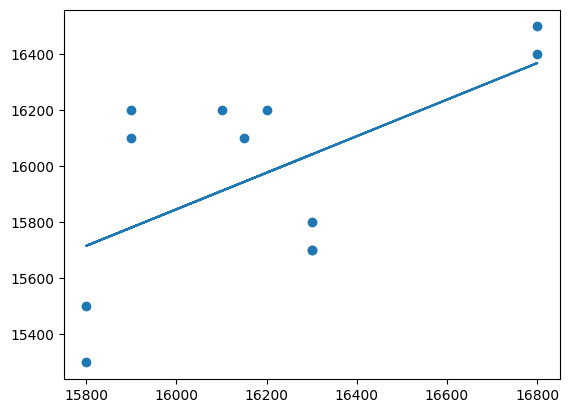

In [8]:
plt.plot(x,reg.predict(x))
plt.scatter(df['Starting (USD)'],df['Ending (USD)'])

In [9]:
df['predicted_y']=reg.predict(x)
df

,Starting (USD),Ending (USD),predicted_y
0,16800,16500,16369.268856
1,15900,16100,15781.944215
2,15800,15300,15716.685922
3,16100,16200,15912.460802
4,16300,15700,16042.977389
5,16800,16400,16369.268856
6,15900,16200,15781.944215
7,15800,15500,15716.685922
8,16150,16100,15945.089949
9,16300,15800,16042.977389


In [10]:
df["loss"] = df["Ending (USD)"] - df["predicted_y"]
df

,Starting (USD),Ending (USD),predicted_y,loss
0,16800,16500,16369.268856,130.731144
1,15900,16100,15781.944215,318.055785
2,15800,15300,15716.685922,-416.685922
3,16100,16200,15912.460802,287.539198
4,16300,15700,16042.977389,-342.977389
5,16800,16400,16369.268856,30.731144
6,15900,16200,15781.944215,418.055785
7,15800,15500,15716.685922,-216.685922
8,16150,16100,15945.089949,154.910051
9,16300,15800,16042.977389,-242.977389


In [11]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

mse = mean_squared_error(df["Ending (USD)"],df["predicted_y"])
mae= mean_absolute_error(df["Ending (USD)"],df["predicted_y"])


In [12]:
print(mse)
print(mae)

80411.23397700385
260.3840017604666


In [13]:
reg.score(x,y)

0.3577804940272571

In [14]:
from sklearn.metrics import r2_score

r2_score(y,reg.predict(x))

0.3577804940272571

In [15]:
reg.coef_,reg.intercept_

(array([0.65258293]), 5405.875557022609)